# Machine Learning Project 1

## Card Transaction Detect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("project_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,94776.676346,-0.003370,0.000999,0.000408,0.003140,0.000606,-0.000164,0.001902,-0.001125,0.000723,...,0.000406,-0.000091,0.001731,-0.000285,0.001151,-0.000082,0.000748,-0.000065,88.454146,0.001786
std,47453.019656,1.962043,1.660464,1.517939,1.417974,1.386157,1.335484,1.248053,1.196347,1.099746,...,0.737797,0.725909,0.613927,0.605282,0.521878,0.483147,0.405775,0.330884,253.222328,0.042220
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-37.060311,-73.216718,-11.126624,...,-34.830382,-10.933144,-32.828995,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084,0.000000,0.000000
25%,54219.750000,-0.920650,-0.594927,-0.886852,-0.847155,-0.688505,-0.768384,-0.552267,-0.208869,-0.641117,...,-0.228389,-0.542256,-0.161970,-0.354376,-0.317164,-0.327481,-0.070787,-0.052782,5.540000,0.000000
50%,84646.000000,0.016455,0.068727,0.181225,-0.016834,-0.052600,-0.274569,0.041637,0.022158,-0.052536,...,-0.029272,0.007256,-0.011235,0.041067,0.018598,-0.051851,0.001595,0.011468,22.000000,0.000000
75%,139203.500000,1.311905,0.805272,1.027788,0.750553,0.613952,0.397776,0.572403,0.326724,0.595730,...,0.186418,0.528286,0.147351,0.438967,0.352305,0.241171,0.091243,0.078700,77.000000,0.000000
max,172792.000000,2.454930,19.167239,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


In [4]:
df_0 = df[df.Class == 0]
df_1 = df[df.Class == 1]
print(len(df_0))
print(len(df_1))
df_1.describe()

# 양 값의 개수가 너무 차이가 난다.

199008
356


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,...,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.0
mean,78200.033708,-4.632999,3.489100,-6.850015,4.518063,-3.087808,-1.383572,-5.422761,0.625195,-2.529519,...,0.755212,-0.021713,-0.087463,-0.114113,0.064575,0.041963,0.166356,0.091916,136.749551,1.0
std,46673.000303,6.631320,4.246547,6.982269,2.805339,5.314190,1.817774,6.985212,6.235322,2.450965,...,3.578670,1.392154,1.691020,0.525555,0.823966,0.481518,1.371467,0.539651,286.732453,0.0
min,472.000000,-30.552380,-8.402154,-31.103685,-0.589440,-22.105532,-6.406267,-37.060311,-37.353443,-11.126624,...,-16.922016,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41221.000000,-5.784957,1.132391,-8.441716,2.328802,-4.584753,-2.396655,-7.965295,-0.225428,-3.796456,...,0.018551,-0.526044,-0.343948,-0.439295,-0.299065,-0.263932,-0.028357,-0.104880,1.000000,1.0
50%,70403.000000,-2.315136,2.721328,-4.996078,4.183863,-1.522962,-1.336683,-3.062240,0.568127,-2.133707,...,0.593285,0.035816,-0.086723,-0.066638,0.124755,-0.003977,0.395326,0.145783,8.720000,1.0
75%,116419.000000,-0.404979,4.668999,-2.152812,6.348729,0.208507,-0.379125,-0.773055,1.712157,-0.784472,...,1.251488,0.611913,0.315199,0.276720,0.497912,0.376654,0.860980,0.391030,109.465000,1.0
max,169966.000000,2.132386,19.167239,2.250210,12.114672,11.095089,5.760059,5.431271,20.007208,3.353525,...,27.202839,5.774087,5.303607,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


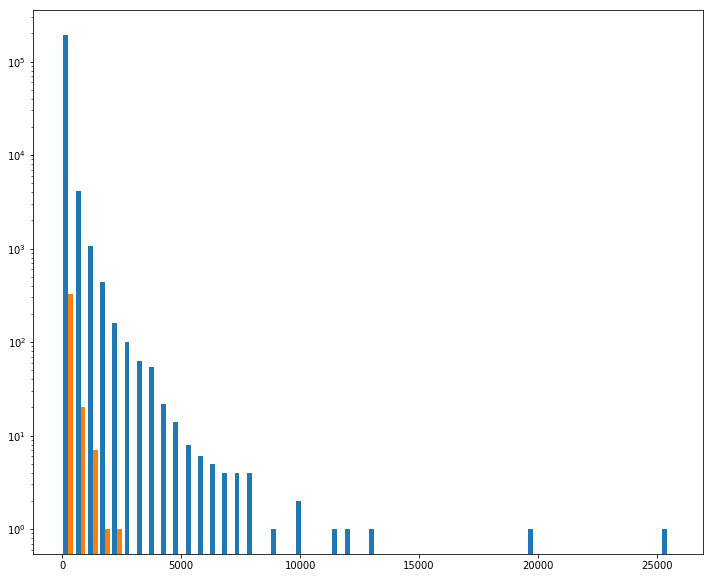

In [6]:
plt.figure(figsize=(12, 10))
#df_1.Amount.hist(bins=50)
#df_0.Amount.hist(bins=50)

plt.hist([df_0.Amount, df_1.Amount], bins=50)
plt.yscale('log')
#plt.hist(, bins=50)


In [7]:
(df_0.Amount == 1).sum()

9654

In [8]:
(df_1.Amount == 1).sum()

88

In [9]:
df.iloc[:, 1: -2].corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
V1,1.000000,0.005622,0.002891,-0.000304,0.002808,-0.000868,-0.005508,-0.000107,-0.002550,-0.001323,...,-0.000828,-0.000819,-0.000095,-0.000641,-0.018804,0.001663,-0.004177,-0.002381,-0.007359,0.005636
V2,0.005622,1.000000,0.002264,-0.004013,0.003417,-0.002509,-0.009297,0.000874,0.001988,0.001222,...,-0.001226,-0.003155,0.000979,-0.002841,-0.021470,0.001377,-0.000663,-0.001908,0.000504,0.008132
V3,0.002891,0.002264,1.000000,-0.000519,0.005834,0.000837,-0.006655,-0.001771,-0.000080,0.000483,...,0.000168,-0.000033,-0.001392,0.001180,-0.005468,0.000273,-0.001697,-0.000514,-0.006559,0.002089
V4,-0.000304,-0.004013,-0.000519,1.000000,-0.001379,0.001199,0.002366,-0.000374,-0.002885,-0.000442,...,-0.000422,0.002263,0.001403,-0.002224,0.009755,0.000215,0.002496,-0.000664,0.002803,-0.003586
V5,0.002808,0.003417,0.005834,-0.001379,1.000000,-0.005063,-0.012346,0.001857,0.001232,0.002501,...,0.001167,0.004317,-0.000487,0.000667,0.001661,-0.001676,-0.000210,0.000621,-0.012303,0.005245
V6,-0.000868,-0.002509,0.000837,0.001199,-0.005063,1.000000,0.007193,-0.002007,-0.000476,-0.000034,...,0.000433,-0.004098,-0.001097,-0.000157,-0.000560,0.001826,-0.000886,0.000821,0.008542,-0.005325
V7,-0.005508,-0.009297,-0.006655,0.002366,-0.012346,0.007193,1.000000,-0.004436,-0.001665,0.000846,...,-0.001164,-0.006625,-0.004202,0.001610,-0.001606,0.000778,0.000240,0.000818,0.011334,-0.010954
V8,-0.000107,0.000874,-0.001771,-0.000374,0.001857,-0.002007,-0.004436,1.000000,0.001329,-0.000899,...,0.000279,0.003466,0.000991,-0.001951,-0.008683,-0.000807,-0.002107,-0.002524,-0.003004,0.002622
V9,-0.002550,0.001988,-0.000080,-0.002885,0.001232,-0.000476,-0.001665,0.001329,1.000000,0.004987,...,0.001005,0.000553,-0.002208,0.000995,0.002526,0.000208,0.000659,-0.003130,-0.000255,-0.000409
V10,-0.001323,0.001222,0.000483,-0.000442,0.002501,-0.000034,0.000846,-0.000899,0.004987,1.000000,...,0.002091,-0.000272,-0.001323,0.002319,0.000786,-0.000517,0.000793,0.001232,0.000491,-0.000653


V1     1
V2     1
V3     1
V4     1
V5     1
V6     1
V7     1
V8     1
V9     1
V10    1
V11    1
V12    1
V13    1
V14    1
V15    1
V16    1
V17    1
V18    1
V19    1
V20    1
V21    1
V22    1
V23    1
V24    1
V25    1
V26    1
V27    1
V28    1
dtype: int64


<Figure size 864x720 with 0 Axes>

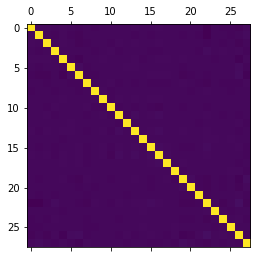

In [10]:
plt.figure(figsize=(12, 10))
plt.matshow(df.iloc[:, 1: -2].corr())
print((df.iloc[:, 1: -2].corr() > 0.5).sum()) 

# 서로 상관계수가 높지 않다. 독립되어 있다는 뜻일까?

In [5]:
"""
plt.figure(figsize=(50, 50))

for i in range(28):
    for j in range(28):
        plt.subplot(28, 28, i * 28 + j + 1)
        
        plt.scatter(df.iloc[:, i + 1], df.iloc[:, j + 1], c=df.Class)     
"""
# 시간이 많이 걸리고 리소스를 너무 많이 잡아먹어서 그리지 않는다.

'\nplt.figure(figsize=(50, 50))\n\nfor i in range(28):\n    for j in range(28):\n        plt.subplot(28, 28, i * 28 + j + 1)\n        \n        plt.scatter(df.iloc[:, i + 1], df.iloc[:, j + 1], c=df.Class)     \n'

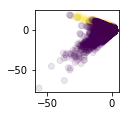

In [6]:
plt.figure(figsize=(50,50))
plt.subplot(28, 28, 1)
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=df.Class, alpha=0.1)

In [7]:
# 주성분 
"""
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=1)
transformed = model.fit_transform(df.iloc[:, 1: 29])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=df.Class)
"""
# 시간이 오래 결려서 안됨

'\nimport matplotlib.pyplot as plt\nfrom sklearn.manifold import TSNE\n\nmodel = TSNE(learning_rate=1)\ntransformed = model.fit_transform(df.iloc[:, 1: 29])\n\nxs = transformed[:,0]\nys = transformed[:,1]\nplt.scatter(xs,ys,c=df.Class)\n'

In [8]:
# train test split

# 한쪽이 너무 과대한게 형성됨
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:30]
y = df.Class

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=42, test_size=0.2)

# 0값과 1값을 동등하게 뽑는다.

class_1_length = len(df_1)

df_0_equal = df_0.sample(n=class_1_length, random_state=42)
new_df = df_0_equal.append(df_1)

X_ = new_df.iloc[:, 1:30]
y_ = new_df.Class

train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(X_, y_, random_state=42, test_size=0.2)


In [9]:
train_y.sum()

280

In [10]:
test_y.sum()

76

In [11]:
# model 1
# logistic

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(train_x, train_y)

clf_2 = LogisticRegression(random_state=0, solver='lbfgs').fit(train_x_2, train_y_2)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [12]:
print(clf.score(test_x, test_y))

print(clf_2.score(test_x_2, test_y_2))

#??? accuracy 상으로는 클수 밖에 없다 (0만 많아서)

# 0값 수 = 1값 수 동일한 양으로 학습한 두번째 분류기는 accuracy가 작다.

0.9990218945150854
0.9370629370629371


In [13]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

p = clf.predict(test_x)

r_s = recall_score(p, test_y)
p_s = precision_score(p, test_y)

print(r_s)
print(p_s)
# recall 82 %
# precision 61 % 
# 리콜이 더 중요하다


0.8245614035087719
0.618421052631579


In [14]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

p = clf_2.predict(test_x_2)

r_s = recall_score(p, test_y_2)
p_s = precision_score(p, test_y_2)

print(r_s)
print(p_s)

# 전반적으로 0이 많은 테스트 셋으로 학습한 것 보다 지표적으로 좋다

0.90625
0.9508196721311475


In [30]:
prob = clf.predict_proba(test_x)

In [39]:
pd.Series(prob[:, 1]).rank()

0        19924.0
1        16948.0
2        19902.0
3        12889.0
4         4062.5
5        16462.0
6         6802.0
7         5013.0
8        35640.0
9        12550.0
10       17863.0
11       13710.0
12       30658.0
13       39640.0
14       19301.0
15       36314.0
16       29453.0
17       34589.0
18        6810.0
19        2028.0
20       25177.0
21       21641.0
22        5812.0
23       32904.0
24       39094.0
25        4174.0
26        1100.0
27       24391.0
28       10614.0
29       14638.0
          ...   
39843    16678.0
39844    33206.0
39845    15207.0
39846    21839.5
39847    13418.0
39848    24156.0
39849    34029.0
39850    26702.0
39851     7727.0
39852    30043.0
39853    23232.0
39854    11600.0
39855    38532.0
39856    12790.0
39857    23375.0
39858     6224.0
39859    19869.0
39860    36438.0
39861    26282.0
39862     7500.0
39863     1777.0
39864    13744.0
39865     2251.0
39866     2487.0
39867    37510.0
39868     2397.0
39869      568.0
39870    35209

In [ ]:
# model 2
# SVM
from sklearn.svm import SVC
# 시간이 오래 거린다. 

# TODO: 여러 커널 사용해보기
svc = SVC(gamma='auto')
svc_2 = SVC(gamma='auto')

svc.fit(train_x, train_y)
svc_2.fit(train_x_2, train_y_2)


In [28]:
svc_3 = SVC(gamma='auto', kernel='linear')
svc_3.fit(train_x_2, train_y_2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svc_4 = SVC(gamma='auto', kernel='poly')
svc_4.fit(train_x_2, train_y_2)

print(svc_4.score(test_x_2, test_y_2))

In [24]:
print(svc.score(test_x, test_y))
print(svc_2.score(test_x_2, test_y_2))

0.9986457000978105
0.8321678321678322


In [29]:
print(svc_3.score(test_x_2, test_y_2))

# linear 커널이 rbf 보다 정확도는 높다

0.951048951048951


In [25]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

p = svc.predict(test_x)

r_s = recall_score(p, test_y)
p_s = precision_score(p, test_y)

print(r_s)
print(p_s)

# svc의 경우 recall 과 precision 의 차이가 크다

0.9230769230769231
0.3157894736842105


In [27]:
p = svc_2.predict(test_x_2)

r_s = recall_score(p, test_y_2)
p_s = precision_score(p, test_y_2)

print(r_s)
print(p_s)

# svc_2 0 = 1 경우 recall의 값이 적다?

0.7402597402597403
0.9344262295081968


In [30]:
p = svc_3.predict(test_x_2)

r_s = recall_score(p, test_y_2)
p_s = precision_score(p, test_y_2)

print(r_s)
print(p_s)

# linear 커널이 recall, precision 지표 모두 좋다

0.95
0.9344262295081968


In [ ]:
# model 3
# random forest or neural net